# Your first neural network

In this project, you'll build your first neural network and use it to predict daily bike rental ridership. We've provided some of the code, but left the implementation of the neural network up to you (for the most part). After you've submitted this project, feel free to explore the data and the model more.



In [40]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
"""
Sua primeira rede neural
Neste projeto, você construirá sua primeira rede neural e a utilizará para prever o número de usuários diários de aluguel
de bicicletas. Fornecemos alguns códigos, mas deixamos a implementação da rede neural 
até você (na maior parte do tempo). Depois de enviar este projeto, sinta-se à vontade para explorar mais os dados e o modelo.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and prepare the data

A critical step in working with neural networks is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data. You'll learn more about this soon!

In [41]:
data_path = 'Bike-Sharing-Dataset/hour.csv'
"""
Carregar e preparar os dados
Um passo crítico no trabalho com redes neurais é preparar os dados corretamente. Variáveis em diferentes escalas 
dificultam que a rede aprenda com eficiência os pesos corretos. Abaixo, escrevemos o código para carregar e preparar os dados.
Você aprenderá mais sobre isso em breve!
"""
rides = pd.read_csv(data_path)

In [42]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Checking out the data

This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. You can see the first few rows of the data above.

Below is a plot showing the number of bike riders over the first 10 days or so in the data set. (Some days don't have exactly 24 entries in the data set, so it's not exactly 10 days.) You can see the hourly rentals here. This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. You'll be trying to capture all this with your model.

'\nVerificando os dados\nEste conjunto de dados tem o número de pilotos para cada hora de cada dia de 1 de janeiro de 2011 a 31 de dezembro de 2012. \nO número de pilotos é dividido entre casual e registrado, resumido na coluna cnt. Você pode ver as primeiras linhas dos dados \nacima.\nAbaixo está um gráfico mostrando o número de ciclistas nos primeiros 10 dias ou mais no conjunto de dados. (Alguns dias não \ntêm exatamente 24 entradas no conjunto de dados, portanto, não são exatamente 10 dias.) Você pode ver as locações por hora \naqui. Esses dados são bem complicados! Os fins de semana são mais baixos em todos os passageiros e há picos quando as pessoas \nestão pedalando para ir e voltar do trabalho durante a semana. Olhando para os dados acima, também temos informações sobre \ntemperatura, umidade e velocidade do vento, todas elas provavelmente afetando o número de passageiros. \nVocê tentará capturar tudo isso com o seu modelo.\n'

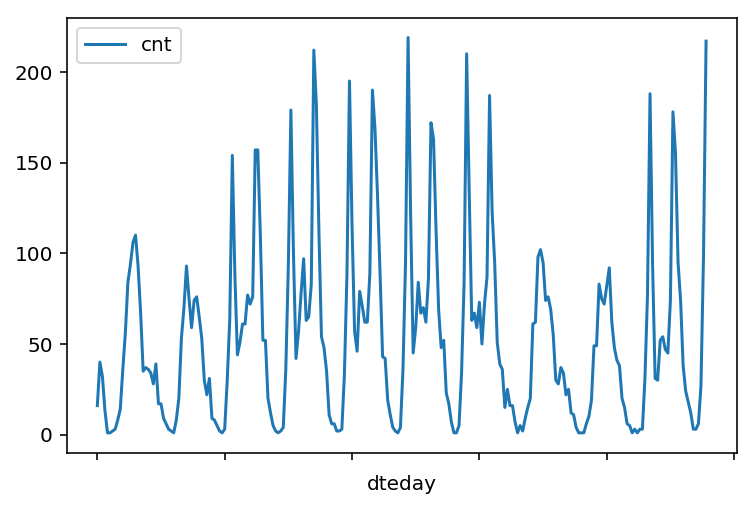

In [43]:
rides[:24*10].plot(x='dteday', y='cnt')
"""
Verificando os dados
Este conjunto de dados tem o número de pilotos para cada hora de cada dia de 1 de janeiro de 2011 a 31 de dezembro de 2012. 
O número de pilotos é dividido entre casual e registrado, resumido na coluna cnt. Você pode ver as primeiras linhas dos dados 
acima.
Abaixo está um gráfico mostrando o número de ciclistas nos primeiros 10 dias ou mais no conjunto de dados. (Alguns dias não 
têm exatamente 24 entradas no conjunto de dados, portanto, não são exatamente 10 dias.) Você pode ver as locações por hora 
aqui. Esses dados são bem complicados! Os fins de semana são mais baixos em todos os passageiros e há picos quando as pessoas 
estão pedalando para ir e voltar do trabalho durante a semana. Olhando para os dados acima, também temos informações sobre 
temperatura, umidade e velocidade do vento, todas elas provavelmente afetando o número de passageiros. 
Você tentará capturar tudo isso com o seu modelo.
"""

### Dummy variables
Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [44]:
"""
### Variáveis fictícias
Aqui temos algumas variáveis categóricas como estação, clima, mês. Para incluí-los em nosso modelo, 
precisaremos fazer variáveis dummy binárias. Isto é simples de fazer com o Pandas graças ao `get_dummies ()`.
"""
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [45]:
"""
Dimensionamento de variáveis de destino
Para facilitar o treinamento da rede, padronizaremos cada uma das variáveis contínuas. Ou seja, vamos mudar e dimensionar as 
variáveis de forma que elas tenham média zero e um desvio padrão de 1.
Os fatores de escala são salvos para que possamos retroceder quando usamos a rede para previsões.
"""
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

### Splitting the data into training, testing, and validation sets

We'll save the data for the last approximately 21 days to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

Dividindo os dados em conjuntos de treinamento, teste e validação

Salvaremos os dados dos últimos 21 dias para usar como um conjunto de testes após termos treinado a rede. Usaremos esse conjunto para fazer previsões e compará-las com o número real de passageiros.

In [46]:
# Save data for approximately the last 21 days 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

We'll split the data into two sets, one for training and one for validating as the network is being trained. Since this is time series data, we'll train on historical data, then try to predict on future data (the validation set).

Vamos dividir os dados em dois conjuntos, um para treinamento e outro para validação conforme a rede estiver sendo treinada. Como são dados de séries temporais, vamos treinar dados históricos e tentar prever dados futuros (o conjunto de validação).

In [47]:
# Hold out the last 60 days or so of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

## Time to build the network

Below you'll build your network. We've built out the structure. You'll implement both the forward pass and backwards pass through the network. You'll also set the hyperparameters: the learning rate, the number of hidden units, and the number of training passes.

Hora de construir a rede

Abaixo você construirá sua rede. Nós construímos a estrutura. Você implementará o passe para frente e o para trás na rede. Você também definirá os hiperparâmetros: a taxa de aprendizado, o número de unidades ocultas e o número de passes de treinamento.

<img src="assets/neural_network.png" width=300px>

The network has two layers, a hidden layer and an output layer. The hidden layer will use the sigmoid function for activations. The output layer has only one node and is used for the regression, the output of the node is the same as the input of the node. That is, the activation function is $f(x)=x$. A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called *forward propagation*.

We use the weights to propagate signals forward from the input to the output layers in a neural network. We use the weights to also propagate error backwards from the output back into the network to update our weights. This is called *backpropagation*.

A rede tem duas camadas, uma camada oculta e uma camada de saída. A camada oculta usará a função sigmóide para ativações. A camada de saída tem apenas um nó e é usada para a regressão, a saída do nó é a mesma que a entrada do nó. Ou seja, a função de ativação é $ f (x) = x $. Uma função que recebe o sinal de entrada e gera um sinal de saída, mas leva em consideração o limite, é chamada de função de ativação. Trabalhamos através de cada camada de nossa rede, calculando as saídas para cada neurônio. Todas as saídas de uma camada se tornam entradas para os neurônios na próxima camada. Este processo é chamado * propagação direta *.

Usamos os pesos para propagar os sinais da entrada para as camadas de saída em uma rede neural. Usamos os pesos para também propagar o erro da saída de volta para a rede para atualizar nossos pesos. Isso é chamado de * backpropagation *.

> **Hint:** You'll need the derivative of the output activation function ($f(x) = x$) for the backpropagation implementation. If you aren't familiar with calculus, this function is equivalent to the equation $y = x$. What is the slope of that equation? That is the derivative of $f(x)$.

>Dica: você precisará da derivada da função de ativação de saída ($f(x) = x$) para a implementação da retropropagação. Se você não está familiarizado com o cálculo, esta função é equivalente à equação $y = x$. Qual é a inclinação dessa equação? Essa é a derivada de $f(x)$.

Below, you have these tasks:
1. Implement the sigmoid function to use as the activation function. Set `self.activation_function` in `__init__` to your sigmoid function.
2. Implement the forward pass in the `train` method.
3. Implement the backpropagation algorithm in the `train` method, including calculating the output error.
4. Implement the forward pass in the `run` method.

Abaixo, você tem estas tarefas:
1. Implemente a função sigmóide para usar como função de ativação. Defina `self.activation_function` em` __init__` para sua função sigmoid.
2. Implemente o passe para frente no método `train`.
3. Implemente o algoritmo de retropropagação no método `train`, incluindo o cálculo do erro de saída.
4. Implemente o forward pass no método `run`.




  

In [48]:
#############
# In the my_answers.py file, fill out the TODO sections as specified
#############

from my_answers import NeuralNetwork

In [49]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

## Unit tests

Run these unit tests to check the correctness of your network implementation. This will help you be sure your network was implemented correctly befor you starting trying to train it. These tests must all be successful to pass the project.

Testes unitários


Execute estes testes unitários para verificar a exatidão de sua implementação de rede. Isso ajudará você a ter certeza de que sua rede foi implementada corretamente antes de começar a treiná-la. Todos estes testes devem ser bem sucedidos para passar o projeto.

In [50]:
import unittest

inputs = np.array([[0.5, -0.2, 0.1]])
targets = np.array([[0.4]])
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_h_o = np.array([[0.3],
                       [-0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'bike-sharing-dataset/hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328], 
                                              [-0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014, -0.20185996], 
                                              [0.39775194, 0.50074398], 
                                              [-0.29887597, 0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.007s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

## Training the network

Here you'll set the hyperparameters for the network. The strategy here is to find hyperparameters such that the error on the training set is low, but you're not overfitting to the data. If you train the network too long or have too many hidden nodes, it can become overly specific to the training set and will fail to generalize to the validation set. That is, the loss on the validation set will start increasing as the training set loss drops.

You'll also be using a method know as Stochastic Gradient Descent (SGD) to train the network. The idea is that for each training pass, you grab a random sample of the data instead of using the whole data set. You use many more training passes than with normal gradient descent, but each pass is much faster. This ends up training the network more efficiently. You'll learn more about SGD later.

### Choose the number of iterations
This is the number of batches of samples from the training data we'll use to train the network. The more iterations you use, the better the model will fit the data. However, this process can have sharply diminishing returns and can waste computational resources if you use too many iterations.  You want to find a number here where the network has a low training loss, and the validation loss is at a minimum. The ideal number of iterations would be a level that stops shortly after the validation loss is no longer decreasing.

### Choose the learning rate
This scales the size of weight updates. If this is too big, the weights tend to explode and the network fails to fit the data. Normally a good choice to start at is 0.1; however, if you effectively divide the learning rate by n_records, try starting out with a learning rate of 1. In either case, if the network has problems fitting the data, try reducing the learning rate. Note that the lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the neural network to converge.

### Choose the number of hidden nodes
In a model where all the weights are optimized, the more hidden nodes you have, the more accurate the predictions of the model will be.  (A fully optimized model could have weights of zero, after all.) However, the more hidden nodes you have, the harder it will be to optimize the weights of the model, and the more likely it will be that suboptimal weights will lead to overfitting. With overfitting, the model will memorize the training data instead of learning the true pattern, and won't generalize well to unseen data.  

Try a few different numbers and see how it affects the performance. You can look at the losses dictionary for a metric of the network performance. If the number of hidden units is too low, then the model won't have enough space to learn and if it is too high there are too many options for the direction that the learning can take. The trick here is to find the right balance in number of hidden units you choose.  You'll generally find that the best number of hidden nodes to use ends up being between the number of input and output nodes.

Treinando a rede

Aqui você configurará os hiperparâmetros para a rede. A estratégia aqui é encontrar hiperparâmetros de forma que o erro no conjunto de treinamento seja baixo, mas você não está super adaptando aos dados. Se você treinar a rede por muito tempo ou tiver muitos nós ocultos, ela poderá se tornar excessivamente específica para o conjunto de treinamento e falhará em generalizar para o conjunto de validação. Ou seja, a perda no conjunto de validação começará a aumentar à medida que a perda do conjunto de treinamento cair.

Você também usará um método conhecido como Descentramento Estocástico de Gradiente (SGD) para treinar a rede. A ideia é que, para cada passe de treinamento, você pegue uma amostra aleatória dos dados em vez de usar o conjunto de dados inteiro. Você usa muito mais passes de treinamento do que com descida de gradiente normal, mas cada passe é muito mais rápido. Isso acaba treinando a rede de forma mais eficiente. Você aprenderá mais sobre o SGD mais tarde.

Escolha o número de iterações

Esse é o número de lotes de amostras dos dados de treinamento que usaremos para treinar a rede. Quanto mais iterações você usar, melhor o modelo se ajustará aos dados. No entanto, esse processo pode ter retornos bastante reduzidos e pode desperdiçar recursos computacionais se você usar muitas iterações. Você deseja encontrar um número aqui em que a rede tenha uma baixa perda de treinamento e a perda de validação seja mínima. O número ideal de iterações seria um nível que pára logo após a perda de validação não estar mais diminuindo.

Escolha a taxa de aprendizado

Isso dimensiona o tamanho das atualizações de peso. Se isso for muito grande, os pesos tendem a explodir e a rede não consegue ajustar os dados. Normalmente, uma boa escolha para começar é 0,1; no entanto, se você dividir efetivamente a taxa de aprendizado por n_records, tente começar com uma taxa de aprendizado de 1. Em ambos os casos, se a rede tiver problemas para ajustar os dados, tente reduzir a taxa de aprendizado. Observe que quanto menor a taxa de aprendizado, menores são as etapas nas atualizações de peso e mais tempo leva para a rede neural convergir.

Escolha o número de nós ocultos

Em um modelo em que todos os pesos são otimizados, quanto mais nós ocultos você tiver, mais precisas serão as previsões do modelo. (Um modelo totalmente otimizado poderia ter pesos de zero, afinal.) No entanto, quanto mais nós ocultos você tiver, mais difícil será otimizar os pesos do modelo, e mais provável será que os pesos abaixo do ideal levem a overfitting. Com overfitting, o modelo memorizará os dados de treinamento em vez de aprender o padrão verdadeiro e não generalizará bem os dados não vistos.
Tente alguns números diferentes e veja como isso afeta o desempenho. Você pode olhar o dicionário de perdas para uma métrica do desempenho da rede. Se o número de unidades ocultas for muito baixo, o modelo não terá espaço suficiente para aprender e, se estiver muito alto, haverá muitas opções para a direção que o aprendizado pode tomar. O truque aqui é encontrar o equilíbrio certo no número de unidades ocultas que você escolher. Você vai

In [51]:
import sys

####################
### Set the hyperparameters in you myanswers.py file ###
####################

from my_answers import iterations, learning_rate, hidden_nodes, output_nodes


N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.ix[batch].values, train_targets.ix[batch]['cnt']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 0.1% ... Training loss: 0.945 ... Validation loss: 1.361

C:\Users\Italo\Anaconda3\envs\aind\lib\site-packages\ipykernel\__main__.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Progress: 100.0% ... Training loss: 0.059 ... Validation loss: 0.146

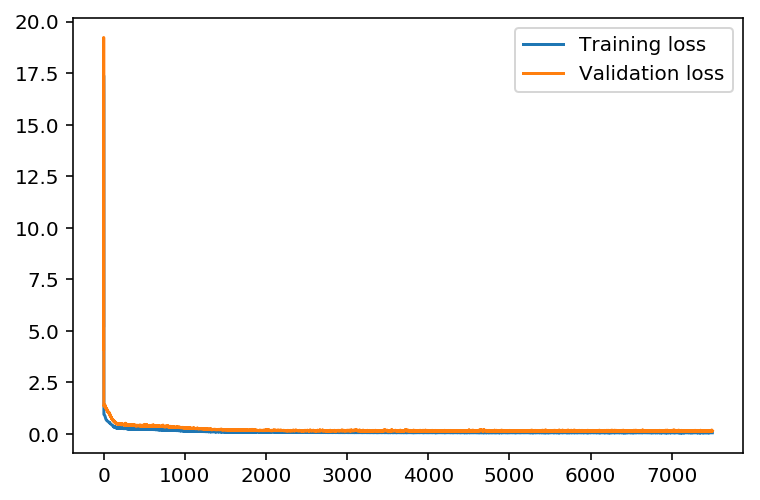

In [52]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

## Check out your predictions

Here, use the test data to view how well your network is modeling the data. If something is completely wrong here, make sure each step in your network is implemented correctly.

Confira suas previsões
Aqui, use os dados de teste para ver como sua rede está modelando os dados. Se algo estiver completamente errado aqui, verifique se cada etapa da sua rede está implementada corretamente.

C:\Users\Italo\Anaconda3\envs\aind\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


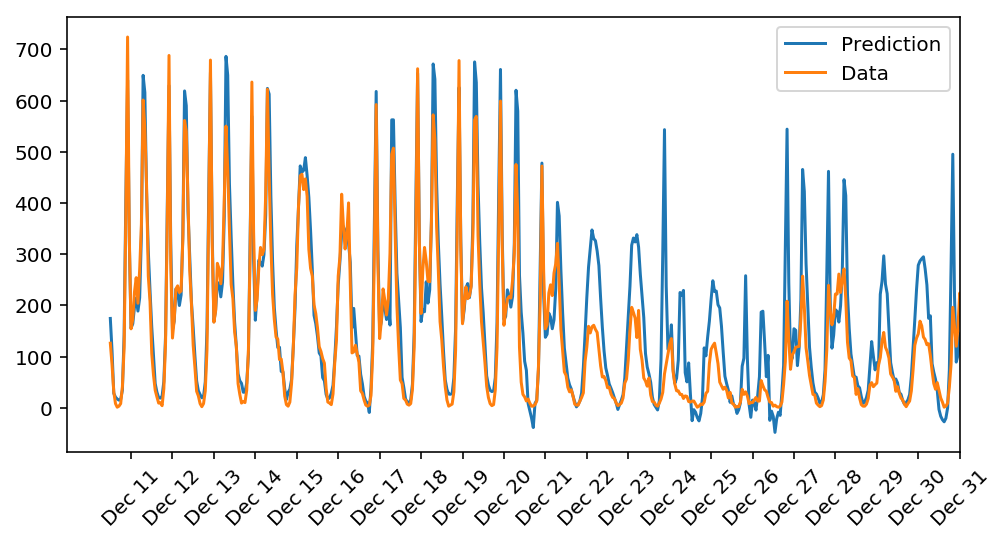

In [53]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

## OPTIONAL: Thinking about your results(this question will not be evaluated in the rubric).
 
Answer these questions about your results. How well does the model predict the data? Where does it fail? Why does it fail where it does?

> **Note:** You can edit the text in this cell by double clicking on it. When you want to render the text, press control + enter

OPCIONAL:

Pensando em seus resultados (essa questão não será avaliada na rubrica).
Responda estas perguntas sobre seus resultados. Quão bem o modelo prevê os dados? Onde isso falha? Por que falha onde isso acontece?
Nota: Você pode editar o texto nesta célula clicando duas vezes nele. Quando você deseja renderizar o texto, pressione control + enter
Sua resposta abaixo
#### Your answer below


The best result obtained using 12 neurons in the hidden layer, learning rate of 0.999 and 7500 iterations, was:

Validation loss: 0.146 and Training loss: 0.059

The network performs well in the test set, especially when it comes to older data, but when referring to more recent data the model has a considerable error since it predicts that more bikes will be leased than the actual value.
I believe that this failure happens because the model has a lot of historical data information, that is, because the model has a lot of information about older data and little information about the latest data, the model makes good predictions for some time, but then it starts to lose precision.